## Интеллектуальный анализ данных 
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
if True in X.isnull():
    print('Yes, there are missing values')
else:
    print('No, there are not missing values')

No, there are not missing values


In [4]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
def model_knn(k, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X[["alcohol", "magnesium"]],y,test_size=0.3, random_state=1)
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    return clf.predict(X_test)

def model_knn1(k, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X[["alcohol", "magnesium"]],y,test_size=0.3, random_state=1)
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    return clf.predict(X_train)

In [9]:
from sklearn.metrics import accuracy_score
k1 = accuracy_score(model_knn(1, X, y),y_test)
k3 = accuracy_score(model_knn(3, X, y),y_test)
k5 = accuracy_score(model_knn(5, X, y),y_test)
k10 = accuracy_score(model_knn(10, X, y),y_test)
k15 = accuracy_score(model_knn(15, X, y),y_test)
k25 = accuracy_score(model_knn(25, X, y),y_test)
df1 = pd.DataFrame() 
df1["Test"] = [k1, k3, k5, k10, k15, k25]
df1.index = [1, 3, 5, 10, 15, 25]
k1 = accuracy_score(model_knn1(1, X, y),y_train)
k3 = accuracy_score(model_knn1(3, X, y),y_train)
k5 = accuracy_score(model_knn1(5, X, y),y_train)
k10 = accuracy_score(model_knn1(10, X, y),y_train)
k15 = accuracy_score(model_knn1(15, X, y),y_train)
k25 = accuracy_score(model_knn1(25, X, y),y_train)
df1["Train"] = [k1, k3, k5, k10, k15, k25]
df1.index.name = 'NN'
df1

,Test,Train
NN,,
1,0.685185,0.991935
3,0.574074,0.677419
5,0.648148,0.693548
10,0.555556,0.645161
15,0.537037,0.564516
25,0.537037,0.596774


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [10]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [11]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

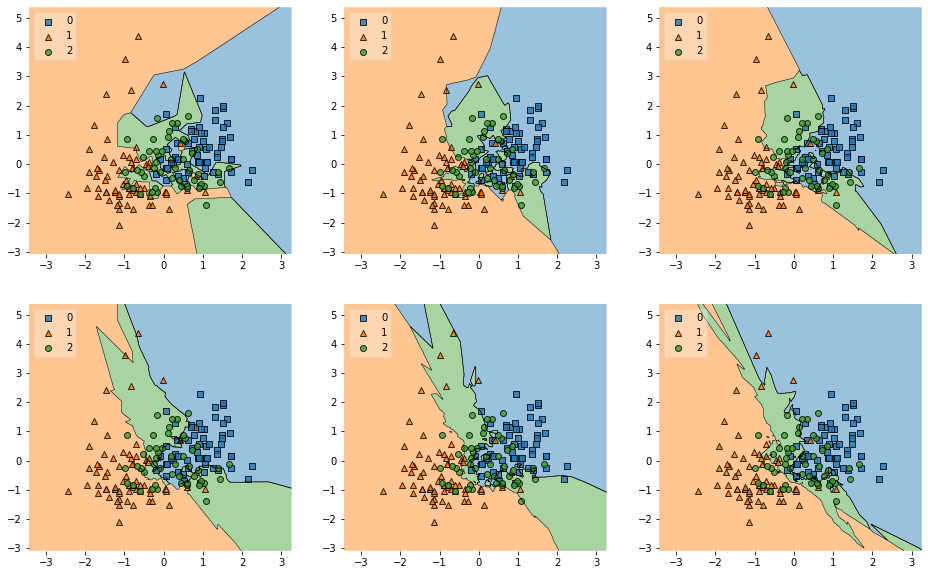

In [12]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


def model_knn(k, X, y):
    scaler = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(X[["alcohol", "magnesium"]]),y,test_size=0.3, random_state=1)
    clf = KNeighborsClassifier(n_neighbors=k)
    return clf.fit(X_train, y_train)
    
k = [1, 3, 5, 10, 15, 25]
fig = plt.figure(figsize=(16, 10))
scaler = StandardScaler()
for i in range(1, 7):
    ax = fig.add_subplot(int("2" + "3" + str(i)))
    plot_decision_regions(np.array(scaler.fit_transform(X[["alcohol", "magnesium"]])), y, clf=model_knn(k[i - 1], X, y), legend=2)

plt.show()

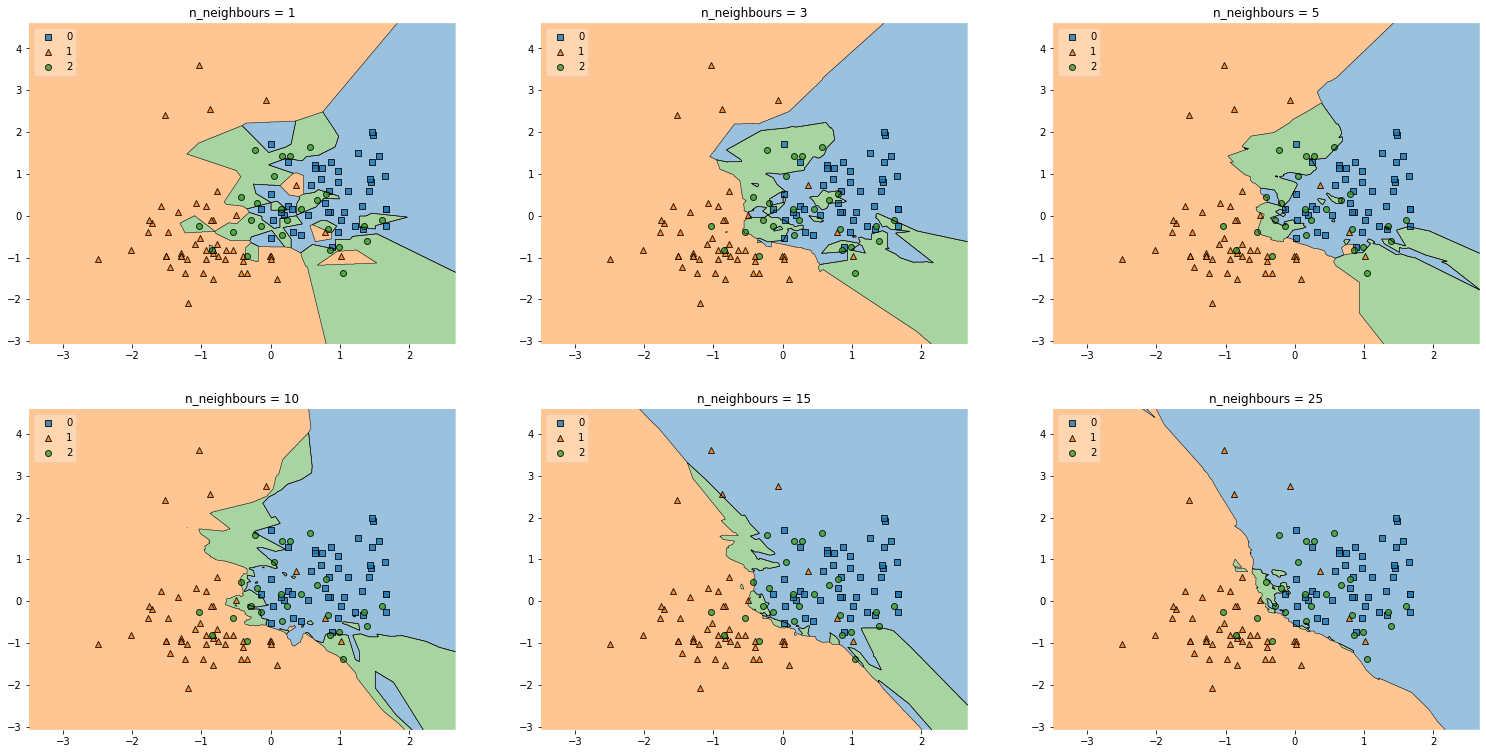

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

С увеличением числа соседей accuracy снижается, то есть чем больше k, тем больше локальных скоплений будет пропадать. Визуально это будет означать, что отдельно взятые точки определенного цвета не попадут в соответствующую классификацию нужного цвета, так как с каждым разом мы распределяем по большему числу признаков, то есть accuracy будет ниже. Наиболее хорошая модель строится с k=5, так как в этом случае наблюдается более правильное распределение.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

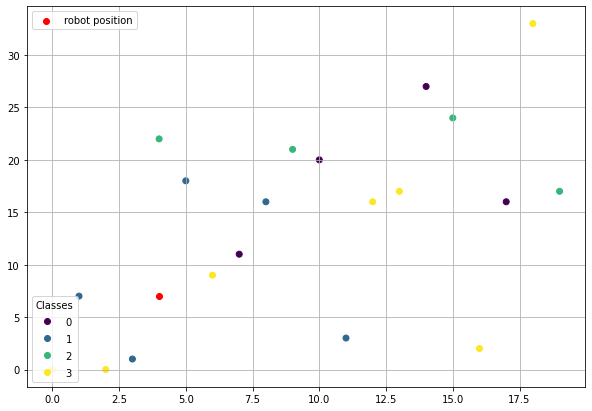

In [13]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position]
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(k).fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        if np.random.binomial(1, 0.2) == 0:
            pos = self.trajectory[-1]
            dirr = self.mapping[self.knn.predict([pos])[0]]
            pos[0] += dirr[0]
            pos[1] += dirr[1]
            self.trajectory.append(pos.copy())
            return pos
        else:
            pos = self.trajectory[-1]
            pos[0] += 1
            self.trajectory.append(pos)
            return pos
        

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [16]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.array(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

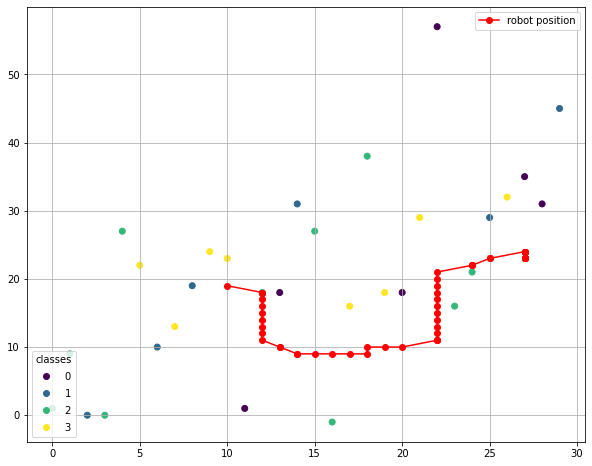

In [17]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

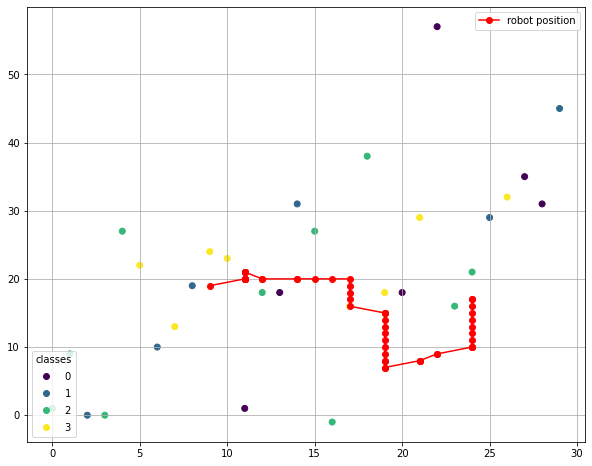

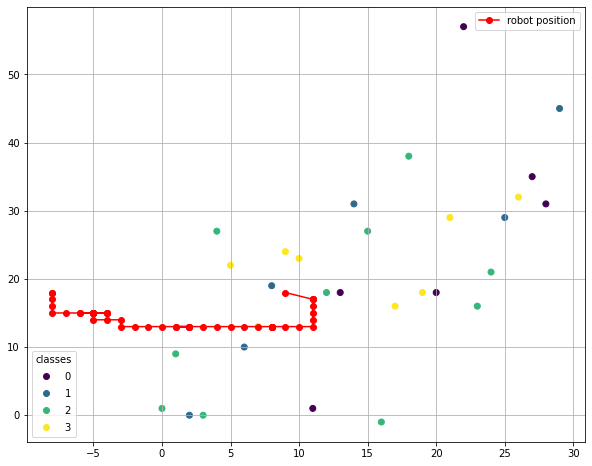

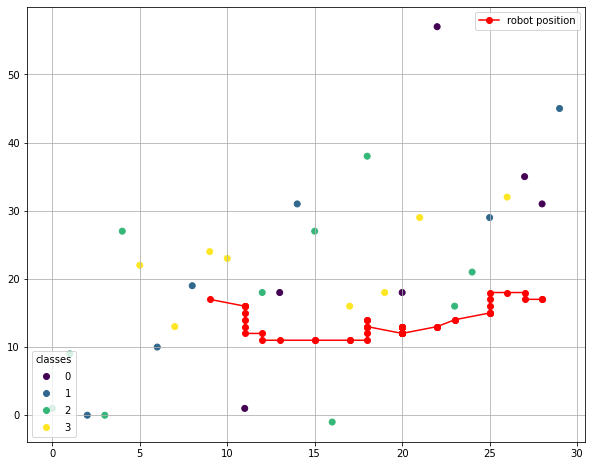

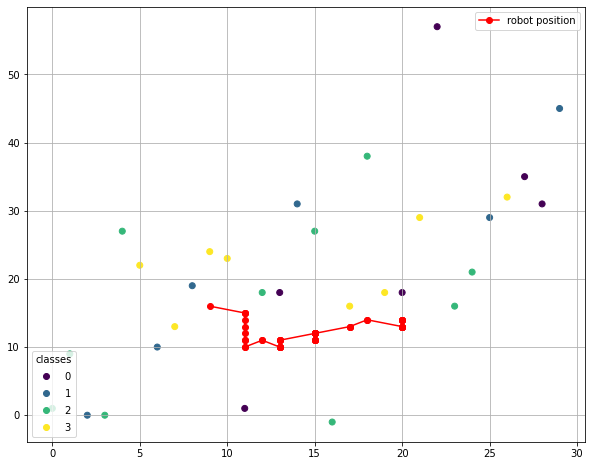

In [18]:
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 15, n_movements = 50)

Таким образом, число соседей влияет на траекторию движения неоднозначно: самое маленькое и самое большое k приводят к большему движению робота вниз , средние значения k обеспечивают движение вправо.

В случае осмысленного назначения классов в 80% робот двигался бы согласно нашим указаниям и в 20% передвигался бы вправо.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [134]:
import seaborn as sns
from pandas import DataFrame

In [135]:
data = pd.read_csv('diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [86]:
if True in data.isnull():
    print('Yes, there are missing values')
else:
    print('No, there are not missing values')

No, there are not missing values


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [87]:
data_new = data.drop(columns=['Unnamed: 0'])
data_new.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [88]:
X = data_new.drop('price', axis=1)
y = data_new['price'] 

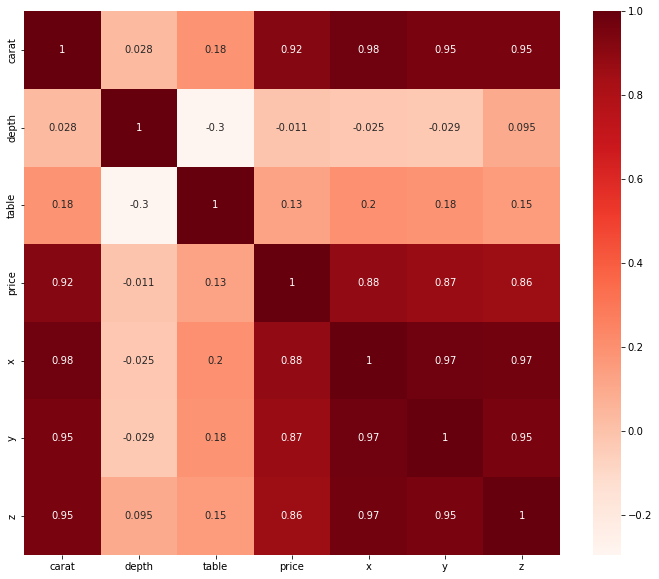

In [89]:
plt.figure(figsize=(12,10))
cor = data_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [90]:
cor = data_new.corr()
print(cor['price'].sort_values(ascending=False))

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


Таким образом, наибольшая корреляция наблюдается между ценой и каратом.

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [91]:
# Источник : https://towardsdatascience.com/encoding-categorical-variables-one-hot-vs-dummy-encoding-6d5b9c46e2db 

In [92]:
from sklearn.preprocessing import OneHotEncoder

In [93]:
data_new.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [94]:
one_hot_data_new = pd.get_dummies(data_new, prefix={'color':'color',
                                        'cut':'cut',
                                        'clarity':'clarity'},
                            drop_first=False)
one_hot_data_new.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = one_hot_data_new.drop('price', axis=1)
y = one_hot_data_new['price'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [97]:
from sklearn.datasets import load_iris 
from sklearn.preprocessing import StandardScaler
# Источник: https://pythonim.ru/libraries/funktsiya-standardscaler-v-python

In [98]:
data = StandardScaler().fit_transform(one_hot_data_new)
dataset = DataFrame(data)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-1.198168,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129,-0.175403,-0.316312,1.225928,...,-0.334294,-0.234343,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954
1,-1.240361,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175,-0.175403,-0.316312,-0.815708,...,-0.334294,-0.234343,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
2,-1.198168,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175,-0.175403,3.161440,-0.815708,...,-0.334294,-0.234343,-0.11802,-0.185268,-0.565361,-0.453289,2.366727,-0.542295,-0.269603,-0.321954
3,-1.071587,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720,-0.175403,-0.316312,-0.815708,...,2.991381,-0.234343,-0.11802,-0.185268,-0.565361,-0.453289,-0.422524,1.844015,-0.269603,-0.321954
4,-1.029394,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674,-0.175403,3.161440,-0.815708,...,-0.334294,4.267248,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [99]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [100]:
lr = LinearRegression().fit(X_train,y_train)

lr.score(X_train, y_train)

0.9189349877290272

In [101]:
print ("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test))))

Train: 1310118.7779581891
Test: 1200741.4177305263


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [102]:
lr.score(X, y)

0.9197437175499541

In [103]:
lr.coef_

array([ 1.10478464e+04, -5.83259992e+01, -2.54756306e+01, -9.30476564e+02,
       -5.63825783e-01, -1.80529801e+01, -5.95655051e+02,  5.39727188e+00,
        2.53356042e+02,  1.81915473e+02,  1.54986265e+02,  8.30306029e+02,
        6.11566611e+02,  5.60968442e+02,  3.38605798e+02, -1.61092957e+02,
       -6.28848207e+02, -1.55150572e+03, -3.89490268e+03,  1.57475680e+03,
       -1.56557765e+02, -1.10367752e+03,  7.75119657e+02,  4.51577721e+02,
        1.21288913e+03,  1.14079466e+03])

In [104]:
lr.intercept_

5022.195674777865

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [105]:
ridge = Ridge(10.0).fit(X_train,y_train)
print ("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test))))

Train: 1311061.118426013
Test: 1204671.180296329


In [106]:
print(ridge.coef_, ridge.intercept_)

[ 1.07647938e+04 -5.37195111e+01 -2.52463918e+01 -8.16548065e+02
  1.00391327e+00 -2.06637921e+01 -5.99601507e+02  4.75042952e+00
  2.54783904e+02  1.82833553e+02  1.57233621e+02  8.22708792e+02
  6.05414779e+02  5.53556909e+02  3.34367134e+02 -1.60927672e+02
 -6.21819048e+02 -1.53330089e+03 -3.81228985e+03  1.55765956e+03
 -1.70542016e+02 -1.10880485e+03  7.61481935e+02  4.39524354e+02
  1.20316837e+03  1.12980250e+03] 4309.713037508294


In [107]:
lasso = Lasso(10.0).fit(X_train,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lasso.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, lasso.predict(X_test))))

Train: 1358792.1452852816
Test: 1253856.5047582895


In [108]:
print(lasso.coef_, lasso.intercept_)

[ 9626.27592177   -63.22941012   -38.15640792  -411.93850105
    -0.            -0.          -440.10597619   -28.71262643
    73.69373587     0.             0.           344.75498871
   167.44031185   122.84226253     0.          -432.73117437
  -828.98875277 -1634.34808678 -3621.24576835   740.34926996
  -648.57424773 -1524.85877596   159.93064867   -28.60450407
   541.48871024   512.24163739] 5180.665623651143


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляризации $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график изменения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [109]:
import matplotlib.pyplot as plt

In [110]:
alpha = [0.1, 1, 10, 100, 200]

In [111]:
l1 = np.linalg.norm(Lasso(alpha[0]).fit(X_train,y_train).coef_)
l2 = np.linalg.norm(Lasso(alpha[1]).fit(X_train,y_train).coef_)
l3 = np.linalg.norm(Lasso(alpha[2]).fit(X_train,y_train).coef_)
l4 = np.linalg.norm(Lasso(alpha[3]).fit(X_train,y_train).coef_)
l5 = np.linalg.norm(Lasso(alpha[4]).fit(X_train,y_train).coef_)
weight_vector_l = [l1, l2, l3, l4, l5]
weight_vector_l

/Users/aleksandragoncarova/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76179207.08441925, tolerance: 61021966.73059439
  model = cd_fast.enet_coordinate_descent(


[12344.236403208783,
 12218.907366126401,
 10664.765205598918,
 5038.884046083116,
 2851.825689687634]

In [112]:
r1 = np.linalg.norm(Ridge(alpha[0]).fit(X_train,y_train).coef_)
r2 = np.linalg.norm(Ridge(alpha[1]).fit(X_train,y_train).coef_)
r3 = np.linalg.norm(Ridge(alpha[2]).fit(X_train,y_train).coef_)
r4 = np.linalg.norm(Ridge(alpha[3]).fit(X_train,y_train).coef_)
r5 = np.linalg.norm(Ridge(alpha[4]).fit(X_train,y_train).coef_)
weight_vector_r = [r1, r2, r3, r4, r5]
weight_vector_r

[12252.235522549607,
 12224.683742207166,
 11957.205450529142,
 9897.980766469233,
 8426.577501766584]

In [113]:
Data = pd.DataFrame({'alpha': alpha, 'lasso': weight_vector_l, 'weight': weight_vector_r})
Data

,alpha,lasso,weight
0,0.1,12344.236403,12252.235523
1,1.0,12218.907366,12224.683742
2,10.0,10664.765206,11957.205451
3,100.0,5038.884046,9897.980766
4,200.0,2851.825690,8426.577502


<function matplotlib.pyplot.show(close=None, block=None)>

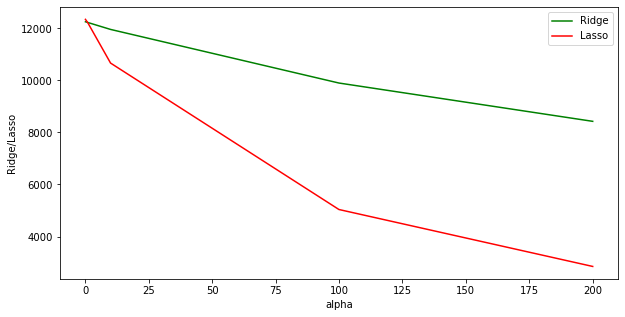

In [114]:
plt.figure(figsize=(10,5))
plt.plot(alpha, weight_vector_r, color='green', label='Ridge')
plt.plot(alpha, weight_vector_l, color='red', label='Lasso')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Ridge/Lasso')
plt.show

Метод Lasso более агрессивно уменьшает веса. Основная задача регуляризотора: штрафовать за большие веса. Следовательно, метод Lasso справляется с этим лучше.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [115]:
from sklearn.linear_model import LassoCV

In [116]:
CV = LassoCV(cv=5, alphas=alpha).fit(X_train, y_train)
CV.alphas_

/Users/aleksandragoncarova/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76179207.08441925, tolerance: 61021966.73059439
  model = cd_fast.enet_coordinate_descent(


array([2.e+02, 1.e+02, 1.e+01, 1.e+00, 1.e-01])

То есть альфы идут в следующем порядке: 200, 100, 10, 1, 0.1

In [117]:
from sklearn.model_selection import cross_val_score

In [125]:
np.mean(CV.mse_path_, axis=1)

array([3546313.34096959, 2530741.9593575 , 1361513.30729217,
       1313447.04852257, 1313440.02466347])

Наименее среднее значение MSE достигается при альфа=0.1, следовательно, это параметр даст наибольшее качество

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [140]:
lasso_1 = Lasso(0.1).fit(X_train,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lasso_1.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, lasso_1.predict(X_test))))

Train: 1310610.683617685
Test: 1201995.8806864317


In [142]:
lasso_1.coef_

array([ 1.09060289e+04, -5.95718156e+01, -2.66596274e+01, -8.86427224e+02,
       -0.00000000e+00, -4.46149581e+00, -7.21073845e+02, -1.39071126e+02,
        9.45023093e+01,  2.11933464e+01,  0.00000000e+00,  4.77443710e+02,
        2.62695359e+02,  2.12726729e+02,  0.00000000e+00, -4.92674824e+02,
       -9.53370051e+02, -1.86438190e+03, -4.36541194e+03,  9.92963208e+02,
       -7.04105954e+02, -1.64406234e+03,  2.15250050e+02, -9.47042402e+01,
        6.47384156e+02,  5.79519554e+02])

Наиболее информативные признаки те, которые по модулю дают наибольшее значение, наименее информативные те, которую зануляются или дают очень маленькое значение

In [139]:
one_hot_data_new.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

Таким образом, наименее информативными признаками оказались 'y', 'cut_Very Good', 'color_G'.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.